<a href="https://colab.research.google.com/github/vimala9s/data_analysis/blob/main/IPL_Data_Alaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyze IPL data




#Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load IPL datasets

In [3]:
df_matches = pd.read_csv("matches.csv")
df_deliveries = pd.read_csv("deliveries.csv")


#Check datatype

In [4]:
print(df_matches.columns)
print(df_deliveries.columns)

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


#check for missing values

In [5]:
print(df_matches["match_id"].isnull().sum())
print(df_deliveries["match_id"].isnull().sum())

0
0


# Merge datasets on match_id

In [6]:
merged_df = pd.merge(df_matches, df_deliveries, on="match_id", how="inner")

# Display basic info and first few rows

In [7]:
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132758 entries, 0 to 132757
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          132758 non-null  int64  
 1   season            132758 non-null  object 
 2   city              129619 non-null  object 
 3   date              132758 non-null  object 
 4   match_type        132758 non-null  object 
 5   player_of_match   132437 non-null  object 
 6   venue             132758 non-null  object 
 7   team1             132758 non-null  object 
 8   team2             132758 non-null  object 
 9   toss_winner       132758 non-null  object 
 10  toss_decision     132758 non-null  object 
 11  winner            132437 non-null  object 
 12  result            132758 non-null  object 
 13  result_margin     130872 non-null  float64
 14  target_runs       132567 non-null  float64
 15  target_overs      132567 non-null  float64
 16  super_over        13

#check for missing values

In [8]:
print("Missing values:\n", merged_df.isnull().sum())

Missing values:
 match_id                 0
season                   0
city                  3139
date                     0
match_type               0
player_of_match        321
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 321
result                   0
result_margin         1886
target_runs            191
target_overs           191
super_over               0
method              130755
umpire1                  0
umpire2                  0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             1
extra_runs               1
total_runs               1
extras_type         125494
is_wicket                1
player_dismissed    126230
dismissal_kind      126230
fielder             128042
dtype: int6

# Categorical Fixes

In [10]:
merged_df['city'].fillna('Unknown', inplace=True)
merged_df['winner'].fillna('No Result', inplace=True)
merged_df['player_of_match'].fillna('Not Awarded', inplace=True)
merged_df['method'].fillna('None', inplace=True)
merged_df['extras_type'].fillna('No Extra', inplace=True)
merged_df['player_dismissed'].fillna('Not Out', inplace=True)
merged_df['dismissal_kind'].fillna('Not Applicable', inplace=True)
merged_df['fielder'].fillna('None', inplace=True)

# Numerical Fixes

In [ ]:
merged_df['result_margin'].fillna(merged_df['result_margin'].median(), inplace=True)
merged_df['target_runs'].fillna(merged_df['target_runs'].mean(), inplace=True)
merged_df['target_overs'].fillna(merged_df['target_overs'].median(), inplace=True)



# Drop irrelevant column (if needed)

In [12]:
merged_df.drop(columns=['method'], inplace=True)

# Final check

In [13]:
print(merged_df.isnull().sum())

match_id            0
season              0
city                0
date                0
match_type          0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin       0
target_runs         0
target_overs        0
super_over          0
umpire1             0
umpire2             0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        1
extra_runs          1
total_runs          1
extras_type         0
is_wicket           1
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


# Basic statistics

In [14]:
print(merged_df.describe())

            match_id  result_margin    target_runs   target_overs  \
count  132758.000000  132758.000000  132758.000000  132758.000000   
mean   579613.190241      17.065134     160.393575      19.812474   
std    186547.865209      21.046582      30.264470       1.367026   
min    335982.000000       1.000000      43.000000       5.000000   
25%    419131.000000       6.000000     142.000000      20.000000   
50%    548339.000000       8.000000     162.000000      20.000000   
75%    733973.000000      21.000000     182.000000      20.000000   
max    980987.000000     144.000000     264.000000      20.000000   

              inning           over           ball   batsman_runs  \
count  132758.000000  132758.000000  132758.000000  132757.000000   
mean        1.482909       9.147343       3.617673       1.212817   
std         0.501635       5.674925       1.808726       1.587155   
min         1.000000       0.000000       1.000000       0.000000   
25%         1.000000       4.0000

# Specific Player Analysis

In [15]:
player_name = "V Kohli"  # Change this to any player name
player_df = merged_df[(merged_df['batter'] == player_name) | (merged_df['bowler'] == player_name)]


# Batting performance

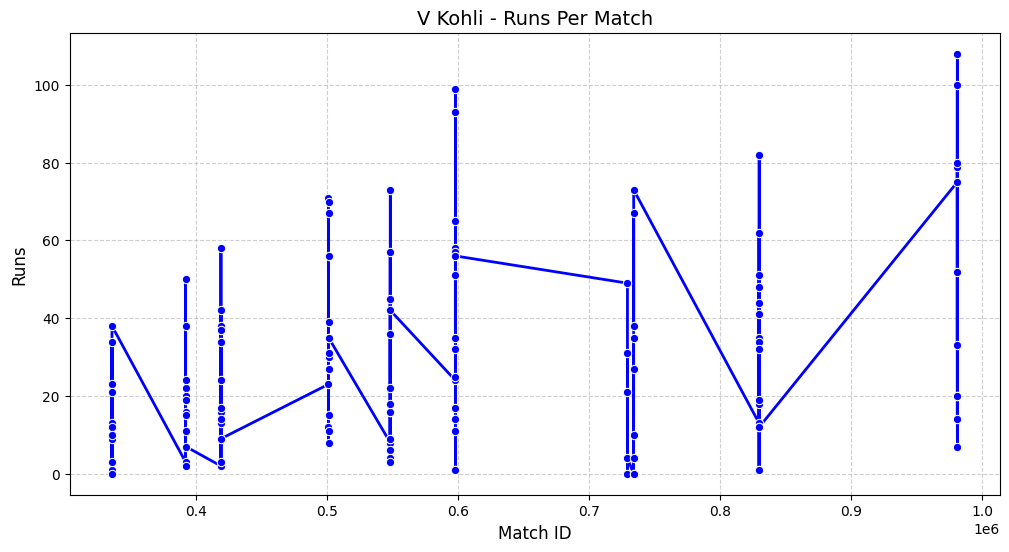

In [16]:
player_batting = player_df[player_df['batter'] == player_name].groupby('match_id')['batsman_runs'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=player_batting.index, y=player_batting.values, marker='o', color='b', linewidth=2)
plt.title(f"{player_name} - Runs Per Match", fontsize=14)
plt.xlabel("Match ID", fontsize=12)
plt.ylabel("Runs", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Batting Strike Rate per Match

<ipython-input-19-c71252d3afaf>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  player_batting_sr = player_df[player_df['batter'] == player_name].groupby('match_id').apply(lambda x: (x['batsman_runs'].sum()/ len(x)) * 100)


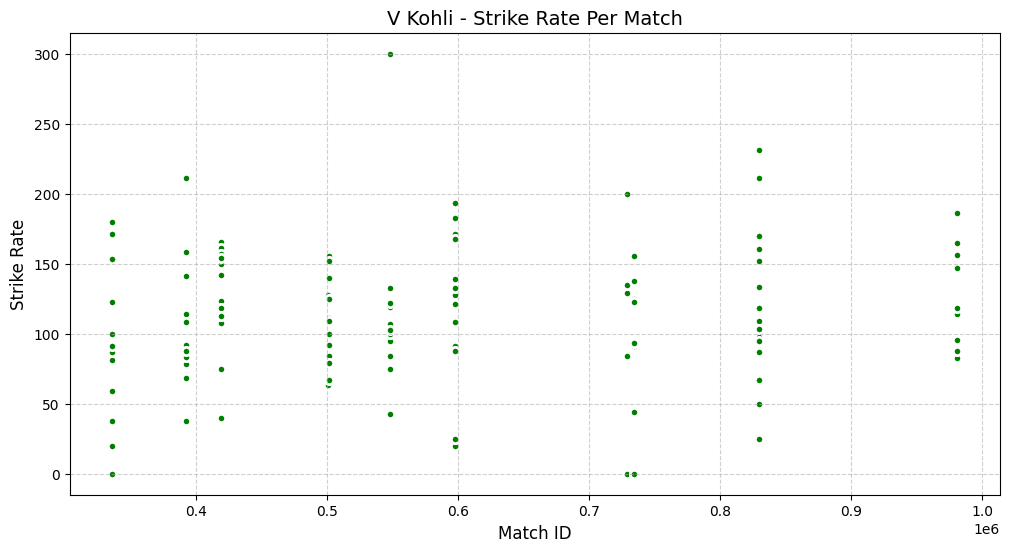

In [19]:
player_batting_sr = player_df[player_df['batter'] == player_name].groupby('match_id').apply(lambda x: (x['batsman_runs'].sum()/ len(x)) * 100)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=player_batting_sr.index, y=player_batting_sr.values, marker='o', color='g', linewidth=2)
plt.title(f"{player_name} - Strike Rate Per Match", fontsize=14)
plt.xlabel("Match ID", fontsize=12)
plt.ylabel("Strike Rate", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Bowling performance

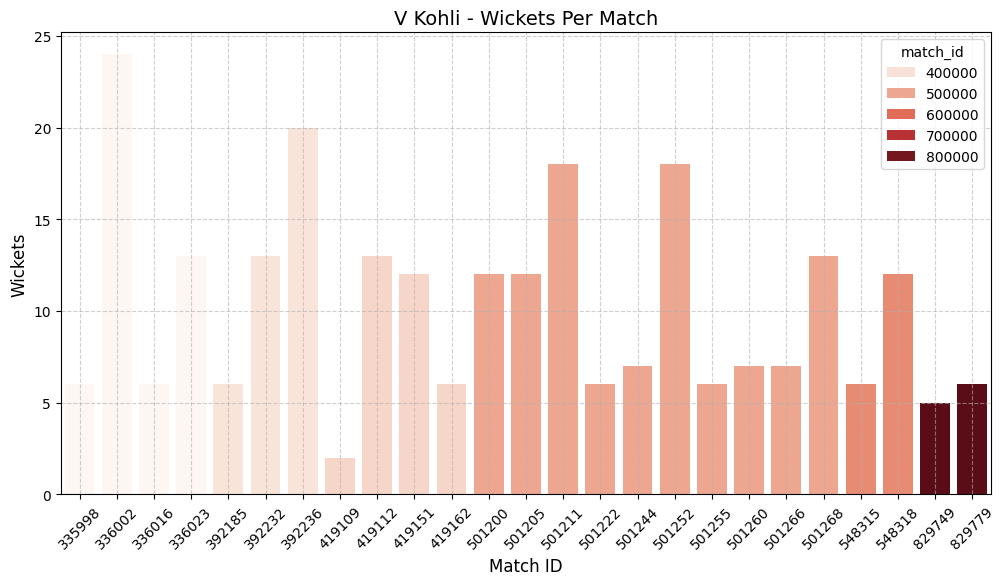

In [35]:
player_bowling = player_df[(player_df['bowler'] == player_name) & (player_df['dismissal_kind'].notnull())].groupby('match_id')['dismissal_kind'].count()
plt.figure(figsize=(12, 6))
sns.barplot(x=player_bowling.index, y=player_bowling.values, hue=player_bowling.index, dodge=False, palette='Reds')
plt.title(f"{player_name} - Wickets Per Match", fontsize=14)
plt.xlabel("Match ID", fontsize=12)
plt.ylabel("Wickets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Top teams by matches won

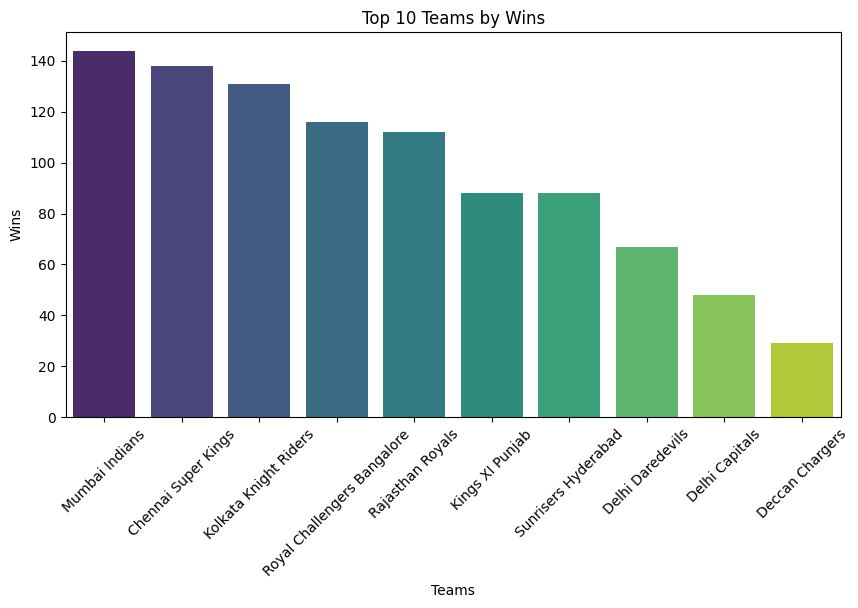

In [37]:
top_teams = df_matches['winner'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_teams.index, y=top_teams.values, hue=top_teams.index, dodge=False, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Teams by Wins")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.show()

# Most successful players (Man of the Match awards)

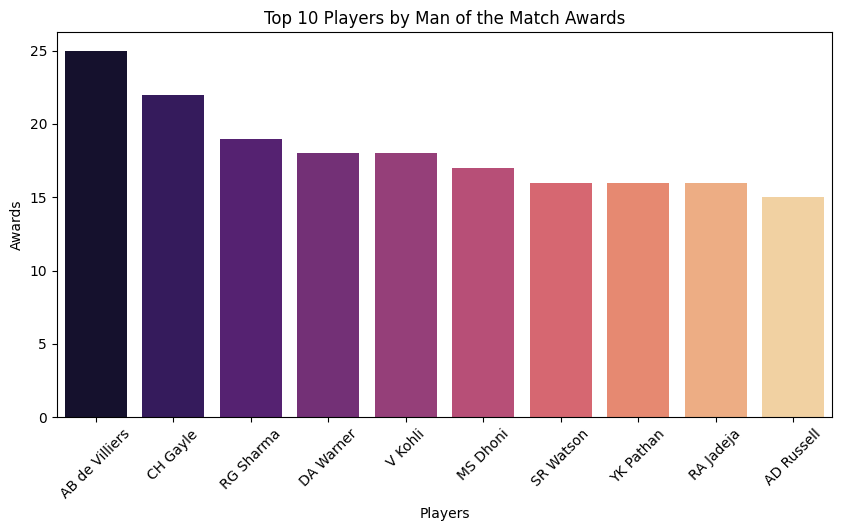

In [38]:
top_players = df_matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_players.index, y=top_players.values, hue=top_players.index, dodge=False, palette='magma', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Players by Man of the Match Awards")
plt.xlabel("Players")
plt.ylabel("Awards")
plt.show()

# Toss Decision Analysis

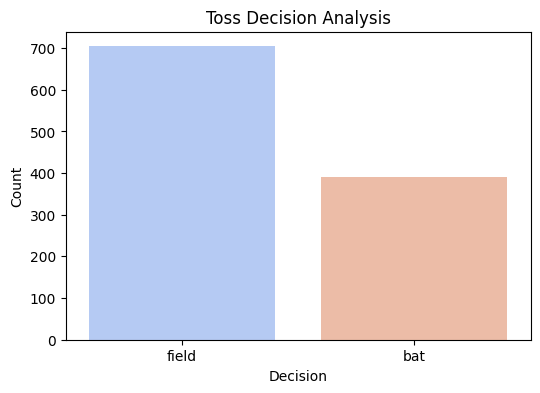

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', data=df_matches, hue='toss_decision', palette='coolwarm', legend=False)
plt.title("Toss Decision Analysis")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()

#Venue Analysis (Most Matches Played)


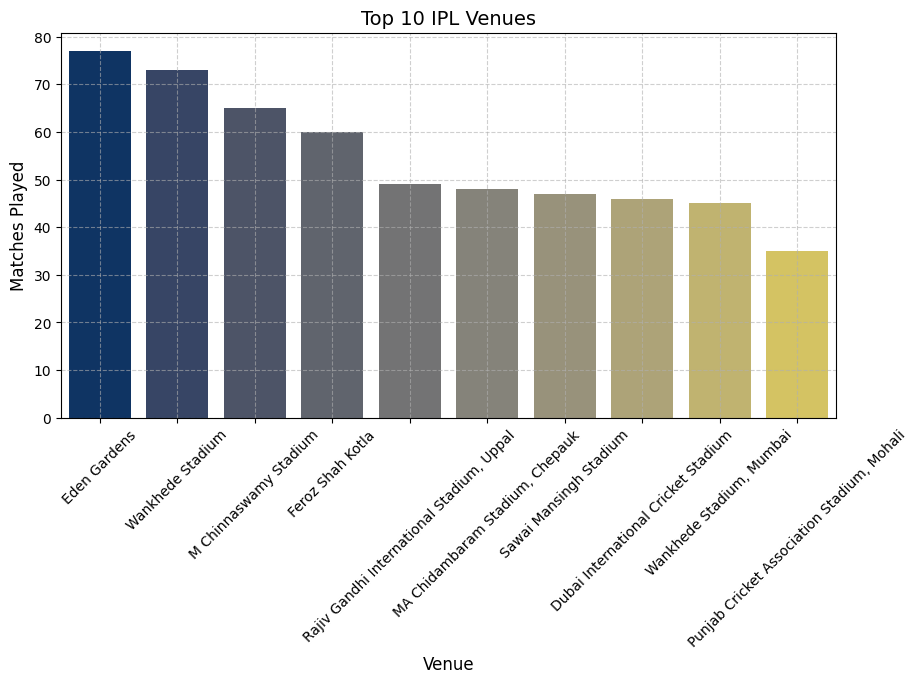

In [27]:
top_venues = df_matches['venue'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_venues.index, y=top_venues.values, hue=top_venues.index, dodge=False, palette='cividis')
plt.xticks(rotation=45)
plt.title("Top 10 IPL Venues", fontsize=14)
plt.xlabel("Venue", fontsize=12)
plt.ylabel("Matches Played", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Group by batter and sum up the runs

In [28]:
top_scorers = df_deliveries.groupby('batter')['batsman_runs'].sum().reset_index()


# Sort by total runs and get the top 10

In [29]:
top_scorers = top_scorers.sort_values(by='batsman_runs', ascending=False).head(10)


# Plot the top scorers

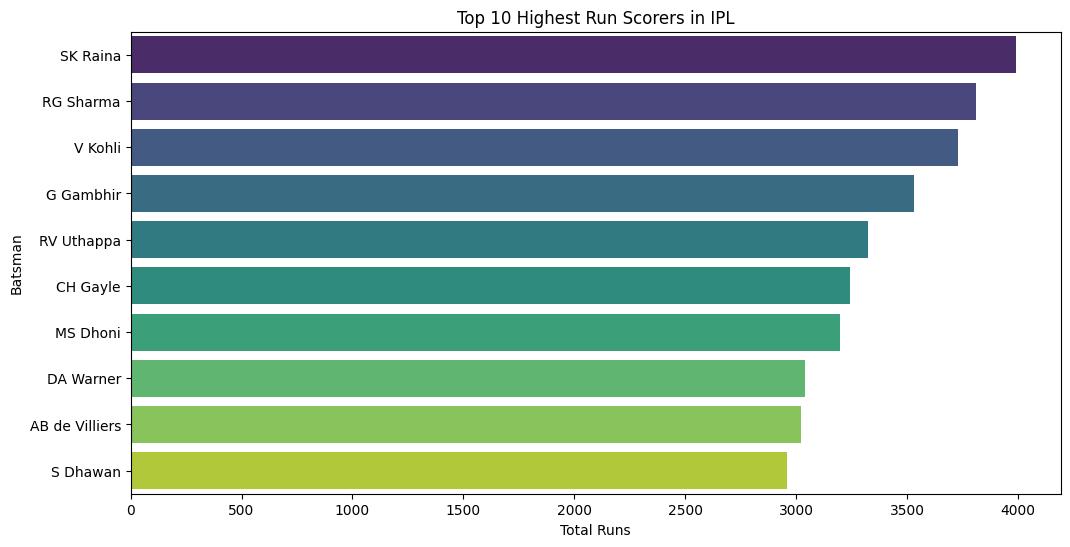

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batter', data=top_scorers, hue='batter', palette='viridis', legend=False)
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.title("Top 10 Highest Run Scorers in IPL")
plt.show()


# Bowler Performance Analysis (Most Wickets)

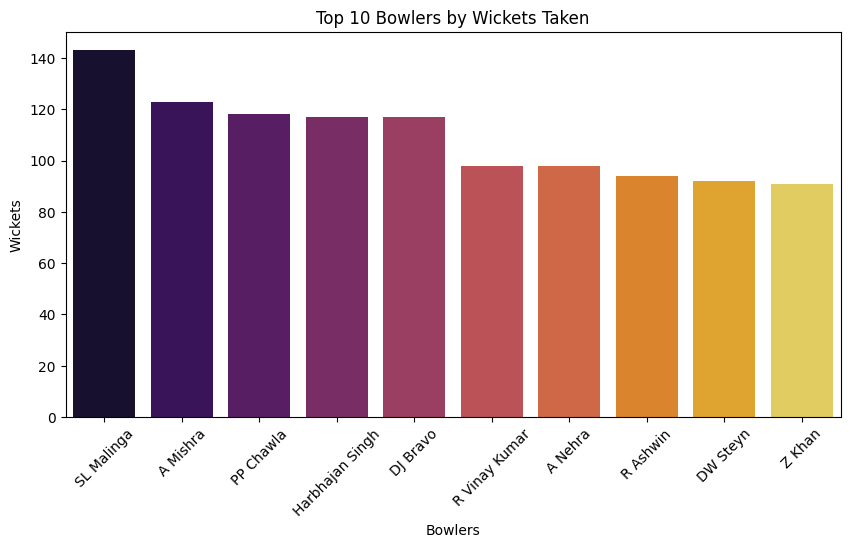

In [41]:
top_bowlers = df_deliveries[df_deliveries['dismissal_kind'].notnull() & (df_deliveries['dismissal_kind'] != 'run out')]
top_bowlers = top_bowlers['bowler'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, hue=top_bowlers.index, dodge=False, palette='inferno', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Bowlers by Wickets Taken")
plt.xlabel("Bowlers")
plt.ylabel("Wickets")
plt.show()

# Strike Rate Analysis (Min 500 Balls Faced)

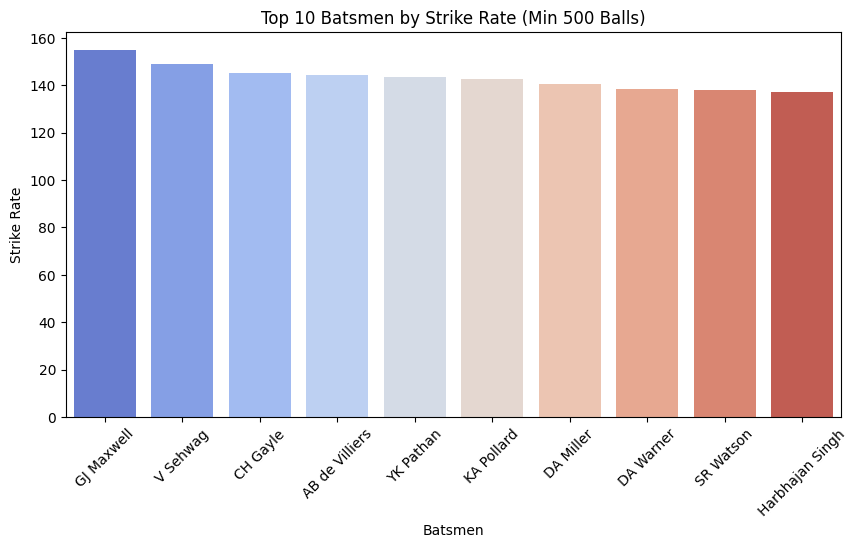

In [42]:
batsman_balls = df_deliveries.groupby('batter')['ball'].count()
batsman_runs = df_deliveries.groupby('batter')['batsman_runs'].sum()
strike_rate = (batsman_runs / batsman_balls) * 100
strike_rate = strike_rate[batsman_balls > 500].sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=strike_rate.index, y=strike_rate.values, hue=strike_rate.index, dodge=False, palette='coolwarm', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Batsmen by Strike Rate (Min 500 Balls)")
plt.xlabel("Batsmen")
plt.ylabel("Strike Rate")
plt.show()

#Runs Distribution per Over

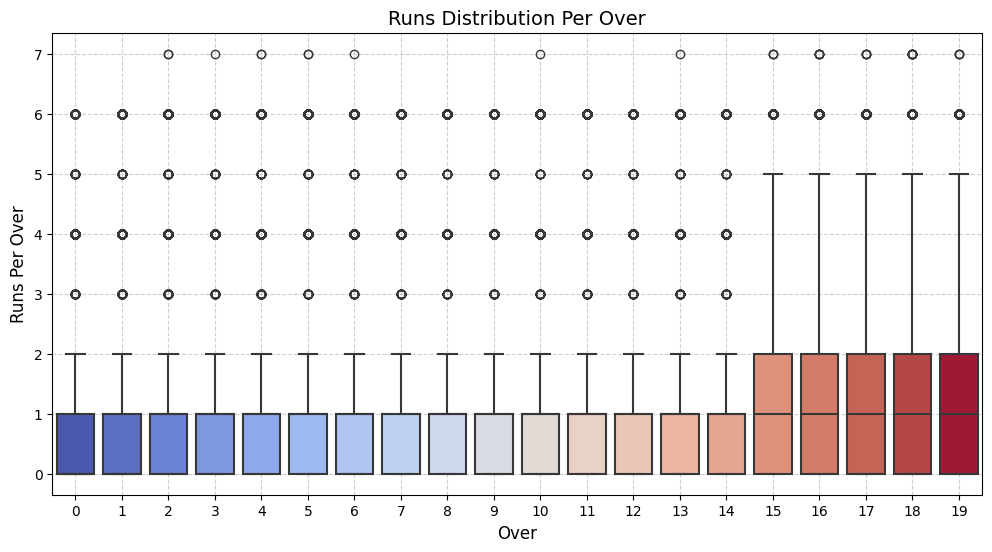

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df['over'], y=merged_df['total_runs'], hue=merged_df['over'], palette='coolwarm', linewidth=1.5, legend=False)
plt.title("Runs Distribution Per Over", fontsize=14)
plt.xlabel("Over", fontsize=12)
plt.ylabel("Runs Per Over", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [34]:
print("Analysis Completed!")

Analysis Completed!
